<a href="https://colab.research.google.com/github/ssoham10/Football_Hackathon/blob/main/FH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/train.csv')

**Getting to know about the DataSet**


---



In [ ]:
pd.pandas.set_option('display.max_columns',None)
data.head()

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data.shape

In [ ]:
len(data.columns)

In [ ]:
col_l=list(data.columns)

**EDA**

---



In [ ]:
#To calculate the number null values in each column
for c in col_l:
  print(sum(pd.isnull(data[c])))

In [ ]:
#Creating list of numerical columns and plotting boxplot for those columns
import matplotlib.pyplot as plt
obj_col = ['winner','team']
num_col = [ele for ele in col_l if ele not in obj_col] 
print(num_col)
for c in num_col:
  plt.boxplot(data[c])
  plt.title(c)
  plt.show()


Since from the boxplots we couldnt find anything, we need to try different graphs. 

AutoViz is a library which helps in creating different visuals for the entire dataset in one line of code.

In [ ]:
pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

In [ ]:
df = AV.AutoViz('/content/train.csv')

Looking at the violin charts, we get to know that only height, weight variables are normal, every other variables are skewed and not normalized.

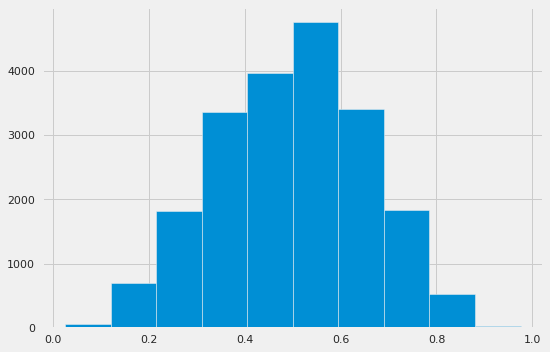

In [ ]:
plt.hist(data['player_height'])
plt.show()

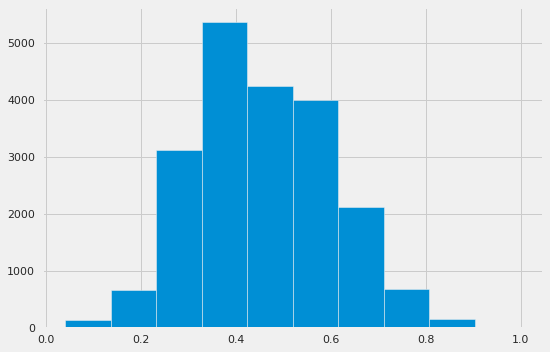

In [ ]:
plt.hist(data['player_weight'])
plt.show()

Hence, confirming the above theory.

To find out which of columns are integer and object type.

In [ ]:
for c in col_l: 
  if data[c].dtypes == 'int64': 
    print(c) 

In [ ]:
for c in col_l: 
  if data[c].dtypes == 'object': 
    print(c) 

To check the variance in rating_num by competition_id and scout_id. To understand whether different scouts and different competition cause change in the rating of a player.

In [ ]:
data['scout_id'].unique()

array([13, 16,  4, 11, 15,  3,  2, 10, 19,  5, 14,  1, 12, 18, 26, 17, 21,
       20, 25, 22,  8])

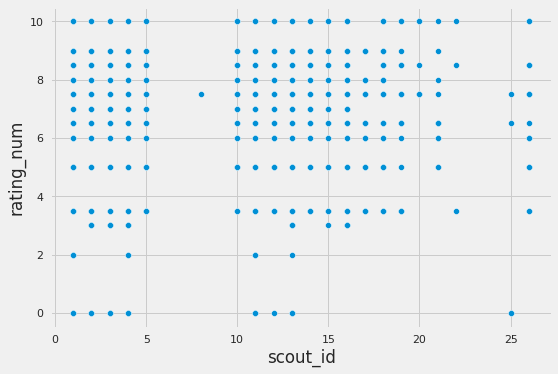

In [ ]:
import seaborn as sns
x = data['scout_id']
y = data['rating_num']

sns.scatterplot(x,y)


Since there are different rated players with respect to each scout_id, we can conclude that scout_id doesn't cause much of a change in rating of a layer.

In [ ]:
data['competitionId'].unique()

array([ 8,  5,  4,  7,  9, 10,  6, 11, 14, 15])

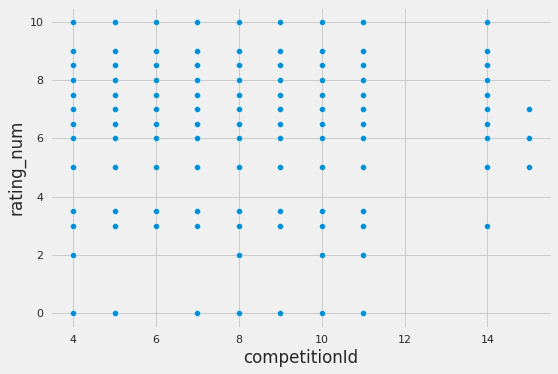

In [ ]:
import seaborn as sns
x = data['competitionId']
y = data['rating_num']

sns.scatterplot(x,y)

Since, there are differently rated players in each competition, competitionId doesnt cause any affect on the rating of the player.

**Feature Engineering**


---



Cleaning the data by eleminating columns with most null values.

In [ ]:
#Creating a list of percentage of Nan values in each column
per_of_nan =[]
for c in col_l:
  per_of_nan.append(np.round(data[c].isnull().mean(),4))
print(per_of_nan)

In [ ]:
#Created a dataframe with column names and their percentage of nan values 
list_of_tuples = list(zip(col_l,per_of_nan))
col_drop_df = pd.DataFrame(list_of_tuples,columns=['column_name','per_of_nan'])
col_drop_df

In [ ]:
#Filtering the columns which have more than 25% of missing values 
col_drop_df = col_drop_df[col_drop_df['per_of_nan']>0.25]
col_drop_df

In [ ]:
#creating the list of those column names
col_drop_l=col_drop_df['column_name']
col_drop_l

In [ ]:
#dropping those columns from the dataset
data = data.drop(columns = col_drop_l)

In [ ]:
#Updated Col_l
col_l = data.columns
col_l

After Dealing with Null values we try to find out if number of 0's in each column is more than the threshold value.



In [ ]:
#Checking the number of zeros 
data.isin([0]).sum(axis=1).max()

Creating List of numerical variables so that the null values in those columns can be replaced by their median.

In [ ]:
#non_num_l consists of categorical variables and rating_num 
non_num_l = ['row_id','scout_id','winner','team','team1_system_id','team2_system_id','competitionId','player_position_1','player_position_2','rating_num']

#initialise the numerical_l list with all the column names
numerical_l = [ ele for ele in col_l ]
#removing the non numerical column names from the numerical_l list
for a in non_num_l:
  if a in col_l:
    numerical_l.remove(a)
len(numerical_l)

Replaced all the missing values in numerical variables with the median value of that specific column

In [ ]:
for feature in numerical_l:
  median_value = data[feature].median() #finding median value for each column
  data[feature].fillna(median_value,inplace = True)#replacing Null values with median

data[numerical_l].isnull().sum()

Since we only dealt with numerical variables, there are 4 columns left with some Null values.

In [ ]:
data[data.columns[data.isnull().any()]]

 To deal with these Null values, we will replace them with the mode of the respective column as these are are categorical variables converted into numerical variables

In [ ]:
cat_l = ['player_position_1','player_position_2','team1_system_id','team2_system_id']#list of categorical variables

for feature in cat_l:
  mode_value = data[feature].mode()
  data[feature].fillna(data[feature].mode()[0], inplace=True)
 

To check the number of unique entries in the categorical variables.

In [ ]:
data['player_position_1'].unique()

array([ 7.,  9., 11., 17., 10.,  8.,  3.,  4.,  1.,  5., 15.,  2., 12.,
        6., 16., 19., 13., 14., 18., 22., 23., 20.])

In [ ]:
data['player_position_2'].unique()

array([ 7.,  9., 11., 17., 10.,  8.,  3.,  4.,  1.,  5., 15.,  2., 12.,
        6., 16., 19., 13., 14., 18., 22., 23., 20.])

In [ ]:
data['team1_system_id'].unique()

array([ 6.,  8., 12., 10., 21., 11., 17., 26., 19., 14., 15.,  7., 18.,
        9., 13., 20.,  4., 27., 22., 28.,  5., 23., 25.])

In [ ]:
data['team2_system_id'].unique()

array([10., 17.,  6.,  8., 18., 26., 12., 27.,  7., 14.,  9., 20., 21.,
       13.,  5.,  4., 19., 15., 11., 23., 22., 28.])

As scout_id, competition_id are the variables which dont affect the rating of a player, they must me dropped. 

In [ ]:
data = data.drop(columns = ['scout_id', 'competitionId'])

To convert the categorical variables i.e 'winner' and 'team' one hot encoding technique is performed.


In [ ]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['winner', 'team'])
one_hot_encoded_data

In [ ]:
data = one_hot_encoded_data

Before going for Feature Selction and making changes in the dataset, we make a copy out of it.

In [ ]:
data_copy = data.copy()

**Feature Selection**

---



In [ ]:
#importing Lasso and SelectFromModel object from sklearn
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

X_train = data.drop(['row_id','rating_num'],axis = 1) #removing the dependent variables

In [ ]:
y_train = data['rating_num'] #creating new dataframe for the dependent variable

In [ ]:
#Using Lasso and SelectFromModel object feature selection is applied to get the list of important variables with respect to our dependent variables
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state = 0))  
feature_sel_model.fit(X_train,y_train)

In [ ]:
#this command returns true or false based on if the column is selected or not
feature_sel_model.get_support()

In [ ]:
#to get the final list of columns
selected_feat = X_train.columns[(feature_sel_model.get_support())]

In [ ]:
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

In [ ]:
X_train=X_train[selected_feat]

Now, X_train is our training dataset using which the model will be trained. 

**Model Buliding & Evaluation**


---



In [ ]:
#performing train and test split for evaluation 
from sklearn.model_selection import train_test_split
X_training, X_test, y_training, y_test = train_test_split(X_train, y_train, test_size =0.3, random_state=0)

In [ ]:
#Creating a function to plot the graphs for training and test dataset
from sklearn.metrics import r2_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    r2 = r2_score(y, y_pred)
    axs[0].set_title('r2 = {:,.2f}'.format(r2))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    print(r2)
    if title!='':
        fig.suptitle(title)


Lasso Regression

0.13922403331764865
0.12730618768559987


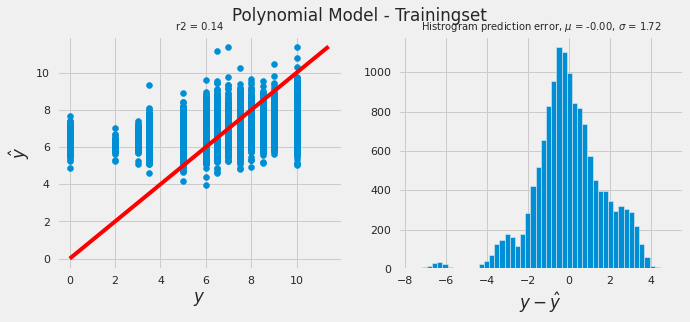

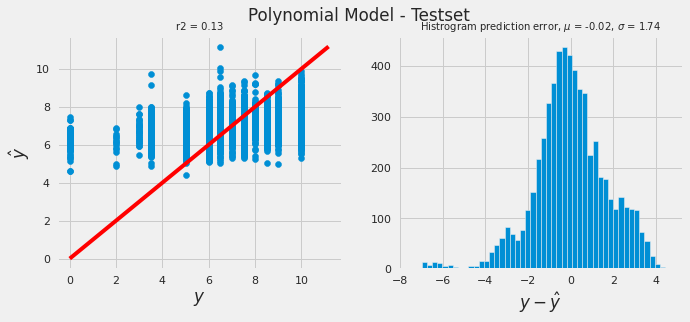

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

#model = LinearRegression()
model1 = Pipeline((
        ("poly", PolynomialFeatures(degree=2)),
        ("lin_reg", Lasso(alpha=0.01))
    ))

model1.fit(X_training, y_training)

y_train_pred = model1.predict(X_training)

plot_prediction_analysis(y_training, y_train_pred, title='Polynomial Model - Trainingset')

y_test_pred = model1.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Polynomial Model - Testset')

As shown the model using Lasso Regression algorithm is giving an r2_score of 0.14 on the training split of X_train and 0.13 on the test split of X_train.

Random Forest Regression

0.8974983359923988
0.28147436179087637


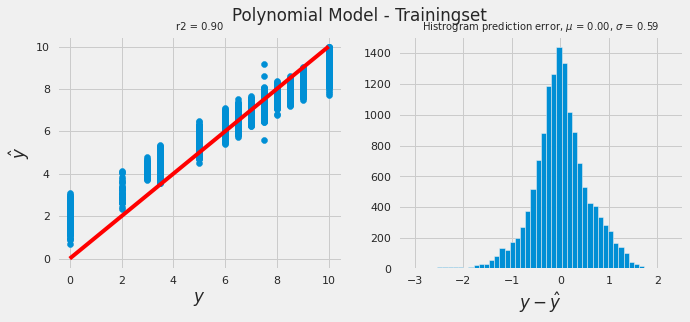

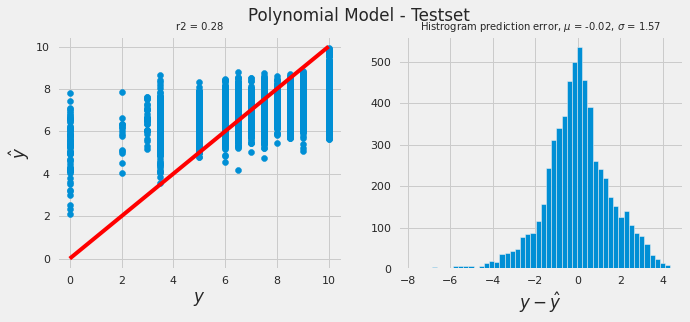

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures


model = Pipeline((
        ("poly", PolynomialFeatures(degree=2)),
        ("lin_reg", RandomForestRegressor())
    ))

model.fit(X_training, y_training)

y_train_pred = model.predict(X_training)

plot_prediction_analysis(y_training, y_train_pred, title='Polynomial Model - Trainingset')

y_test_pred = model.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Polynomial Model - Testset')

As shown the model using Random Forest Regressor algorithm is giving an r2_score of 0.9 on the training split of X_train and 0.28 on the test split of X_train.

Decision Tree Regression

0.9997899453467635
-0.5103584449977656


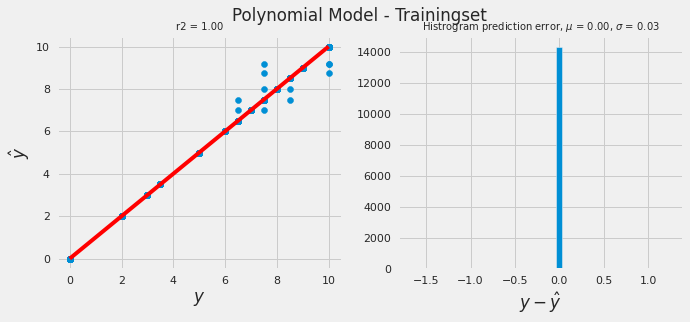

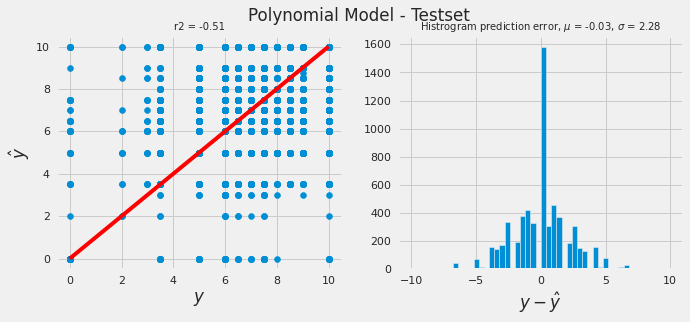

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures


model2 = Pipeline((
        ("poly", PolynomialFeatures(degree=2)),
        ("lin_reg", DecisionTreeRegressor())
    ))

model2.fit(X_training, y_training)

y_train_pred = model2.predict(X_training)

plot_prediction_analysis(y_training, y_train_pred, title='Polynomial Model - Trainingset')

y_test_pred = model2.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Polynomial Model - Testset')

As shown the model using Decision Tree algorithm is giving an r2_score of 1.0 on the training split of X_train and -0.51 on the test split of X_train.

Linear Regression

0.2907889282313083
0.10745350282569288


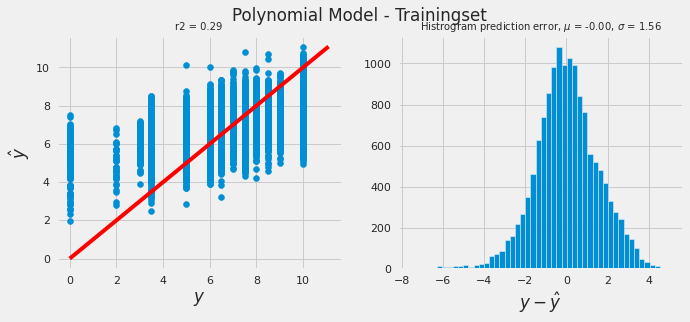

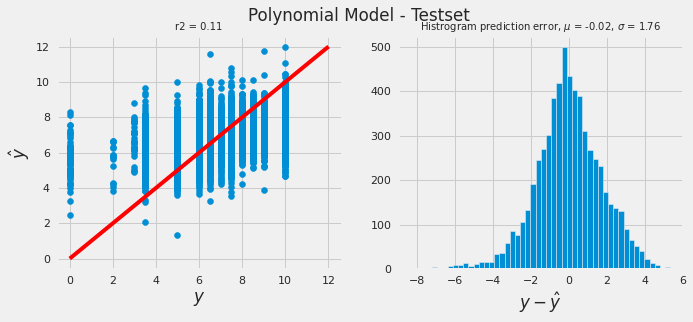

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


model3 = Pipeline((
        ("poly", PolynomialFeatures(degree=2)),
        ("lin_reg", LinearRegression())
    ))

model3.fit(X_training, y_training)

y_train_pred = model3.predict(X_training)

plot_prediction_analysis(y_training, y_train_pred, title='Polynomial Model - Trainingset')

y_test_pred = model3.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Polynomial Model - Testset')

As shown the model using Linear Regression algorithm is giving an r2_score of 0.29 on the training split of X_train and 0.11 on the test split of X_train.

Ridge Regression

0.26350635588088134
0.14026952139600712


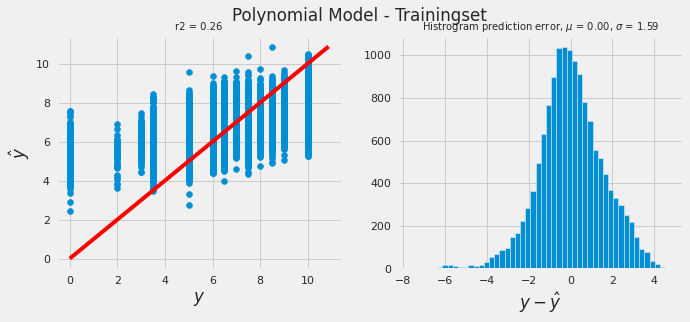

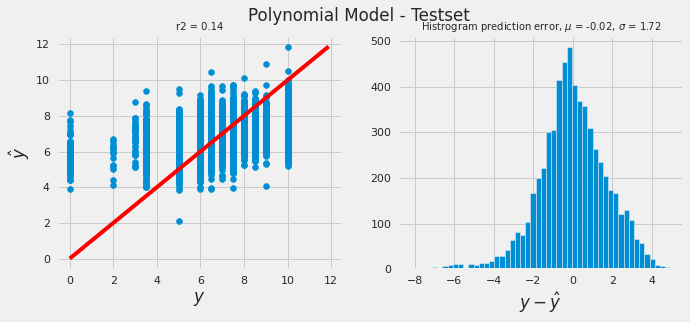

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


model4 = Pipeline((
        ("poly", PolynomialFeatures(degree=2)),
        ("lin_reg", Ridge())
    ))

model4.fit(X_training, y_training)

y_train_pred = model4.predict(X_training)

plot_prediction_analysis(y_training, y_train_pred, title='Polynomial Model - Trainingset')

y_test_pred = model4.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Polynomial Model - Testset')

As shown the model using Ridge Regression algorithm is giving an r2_score of 0.26 on the training split of X_train and 0.14 on the test split of X_train.

**Feature Engineering for test data**


---



In [ ]:
t_data = pd.read_csv('/content/test.csv')
t_data

In [ ]:
tcol_l=list(t_data.columns)

Cleaning the data by eleminating columns with most null values.

In [ ]:
#Creating a list of percentage of Nan values in each column
per_of_nan =[]
for c in tcol_l:
  per_of_nan.append(np.round(t_data[c].isnull().mean(),4))
print(per_of_nan)

In [ ]:
#Created a dataframe with column names and their percentage of nan values 
list_of_tuples = list(zip(tcol_l,per_of_nan))
col_drop_df = pd.DataFrame(list_of_tuples,columns=['column_name','per_of_nan'])
col_drop_df

In [ ]:
#Filtering the columns which have more than 25% of missing values 
col_drop_df = col_drop_df[col_drop_df['per_of_nan']>0.25]
col_drop_df

In [ ]:
#creating the list of those column names
col_drop_l=col_drop_df['column_name']
col_drop_l

In [ ]:
#dropping those columns from the dataset
t_data = t_data.drop(columns = col_drop_l)

In [ ]:
#Updated tCol_l
tcol_l = t_data.columns
tcol_l

After Dealing with Null values we try to find out if number of 0's in each column is more than the threshold value.

In [ ]:
#Checking the number of zeros 
t_data.isin([0]).sum(axis=1).max()

Creating List of numerical variables so that the null values in those columns can be replaced by their median.

In [ ]:
#non_num_l consists of categorical variables and rating_num 
non_num_l = ['row_id','scout_id','winner','team','team1_system_id','team2_system_id','competitionId','player_position_1','player_position_2']

#initialise the numerical_l list with all the column names
numerical_l = [ ele for ele in tcol_l ]
#removing the non numerical column names from the numerical_l list
for a in non_num_l:
  if a in tcol_l:
    numerical_l.remove(a)
len(numerical_l)

Replaced all the missing values in numerical variables with the median value of that specific column

In [ ]:
for feature in numerical_l:
  median_value = t_data[feature].median() #finding median value for each column
  t_data[feature].fillna(median_value,inplace = True)#replacing Null values with median

t_data[numerical_l].isnull().sum()

In [ ]:
t_data[t_data.columns[t_data.isnull().any()]]

To deal with these Null values, we will replace them with the mode of the respective column as these are are categorical variables converted into numerical variables

In [ ]:
cat_l = ['player_position_1','player_position_2','team1_system_id','team2_system_id','team','competitionId']#list of categorical variables

for feature in cat_l:
  mode_value = t_data[feature].mode()
  t_data[feature].fillna(t_data[feature].mode()[0], inplace=True)

As scout_id, competition_id are the variables which dont affect the rating of a player, they must me dropped.

In [ ]:
t_data = t_data.drop(columns = ['scout_id', 'competitionId'])

To convert the categorical variables i.e 'winner' and 'team' one hot encoding technique is performed.

In [ ]:
one_hot_encoded_data1 = pd.get_dummies(t_data, columns = ['winner', 'team'])
one_hot_encoded_data1

In [ ]:
t_data = one_hot_encoded_data1

In [ ]:
t_data_copy = t_data.copy()

**Filtering the test data with the 54 selected features.**

In [ ]:
t_data = t_data[selected_feat]

Creating a outfut file with lasso regression

---




In [ ]:
model1.predict(t_data)

In [ ]:
sub1 = t_data_copy[['row_id']]
sub1['rating_num'] = np.round(model1.predict(t_data),4)
sub1

In [ ]:
sub1.to_csv('sub1_lasso.csv',index=False)

Creating a outfut file with Decision Tree Regressor

---

In [ ]:
sub2 = t_data_copy[['row_id']]
sub2['rating_num'] = model2.predict(t_data)
sub2

In [ ]:
sub2.to_csv('sub2_DCR.csv',index=False)

Creating a outfut file with Linear Regression

---

In [ ]:
sub3 = t_data_copy[['row_id']]
sub3['rating_num'] = model3.predict(t_data)
sub3

In [ ]:
sub3.to_csv('sub3_LinearR.csv',index=False)

Creating a outfut file with Ridge Regression

---

In [ ]:
sub4 = t_data_copy[['row_id']]
sub4['rating_num'] = model4.predict(t_data)
sub4

In [ ]:
sub4.to_csv('sub4_RidgeR.csv',index=False)